In [1]:
!pip install niapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 15.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import joblib

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

import niapy

from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import CamelAlgorithm

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [3]:
class SVRFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.8):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVR(kernel="rbf"), self.X_train.loc[:, selected], self.y_train, cv=10, n_jobs=-1,scoring='r2').mean()
        #accuracy = cross_val_score(SVR(kernel="rbf"), self.X_train[:, selected], self.y_train, cv=10, n_jobs=-1, scoring='r2').mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return (self.alpha * score) + (1 - self.alpha) * (num_selected / num_features)

In [4]:
#LOAD DATASET

df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [5]:
df_train.isna().any().any()
df_train.duplicated().any()

False

In [6]:
X_train = df_train.drop(columns=["Pic50"])
y_train = df_train["Pic50"]

X_test=df_test.drop(["Pic50"],axis=1)
y_test = df_test['Pic50']

In [7]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (196, 881)
y_train shape: (196,)


In [8]:
problem = SVRFeatureSelection(X_train, y_train)
task = Task(problem, max_iters=20)
algorithm = CamelAlgorithm(population_size=30, burden_factor=0.5, supply_init=25, endurance_init=25, seed=1234)
best_features, best_fitness = algorithm.run(task)

In [9]:
feature_name = X_train.columns

selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())
print('Selected features:', ', '.join(feature_name[selected_features].tolist()))

Number of selected features: 404
Selected features: PubchemFP2, PubchemFP8, PubchemFP10, PubchemFP13, PubchemFP15, PubchemFP16, PubchemFP22, PubchemFP23, PubchemFP26, PubchemFP27, PubchemFP28, PubchemFP32, PubchemFP36, PubchemFP37, PubchemFP39, PubchemFP42, PubchemFP47, PubchemFP52, PubchemFP54, PubchemFP56, PubchemFP57, PubchemFP58, PubchemFP63, PubchemFP65, PubchemFP68, PubchemFP71, PubchemFP72, PubchemFP73, PubchemFP74, PubchemFP77, PubchemFP78, PubchemFP81, PubchemFP84, PubchemFP90, PubchemFP92, PubchemFP93, PubchemFP95, PubchemFP102, PubchemFP104, PubchemFP109, PubchemFP110, PubchemFP113, PubchemFP115, PubchemFP117, PubchemFP119, PubchemFP123, PubchemFP124, PubchemFP125, PubchemFP126, PubchemFP128, PubchemFP133, PubchemFP137, PubchemFP139, PubchemFP140, PubchemFP141, PubchemFP143, PubchemFP144, PubchemFP145, PubchemFP149, PubchemFP153, PubchemFP154, PubchemFP155, PubchemFP157, PubchemFP159, PubchemFP160, PubchemFP161, PubchemFP163, PubchemFP164, PubchemFP166, PubchemFP172, Pubchem

In [10]:
# Model SVR untuk regresi
model_all = SVR(kernel='rbf')
# Menghitung akurasi menggunakan cross-validation
score_all = cross_val_score(model_all, X_train, y_train, scoring='r2', cv=10, n_jobs=-1).mean()
print('All Features R2 Accuracy:', score_all)


All Features R2 Accuracy: 0.44707559845405137


In [11]:
model_selected = SVR(kernel='rbf')
X_train_selected = X_train.iloc[:, selected_features]
score_select = cross_val_score(model_selected, X_train_selected, y_train, scoring='r2', cv=10, n_jobs=-1).mean()
print('Selected Features R2 Accuracy:', score_select)

Selected Features R2 Accuracy: 0.514469247345555


In [12]:
selected_feature = feature_name[selected_features].tolist()
joblib.dump(selected_feature,"selected_feature_rbf.pkl")

['selected_feature_rbf.pkl']

In [13]:
feature_selected = joblib.load("selected_feature_rbf.pkl")
feature_selected

['PubchemFP2',
 'PubchemFP8',
 'PubchemFP10',
 'PubchemFP13',
 'PubchemFP15',
 'PubchemFP16',
 'PubchemFP22',
 'PubchemFP23',
 'PubchemFP26',
 'PubchemFP27',
 'PubchemFP28',
 'PubchemFP32',
 'PubchemFP36',
 'PubchemFP37',
 'PubchemFP39',
 'PubchemFP42',
 'PubchemFP47',
 'PubchemFP52',
 'PubchemFP54',
 'PubchemFP56',
 'PubchemFP57',
 'PubchemFP58',
 'PubchemFP63',
 'PubchemFP65',
 'PubchemFP68',
 'PubchemFP71',
 'PubchemFP72',
 'PubchemFP73',
 'PubchemFP74',
 'PubchemFP77',
 'PubchemFP78',
 'PubchemFP81',
 'PubchemFP84',
 'PubchemFP90',
 'PubchemFP92',
 'PubchemFP93',
 'PubchemFP95',
 'PubchemFP102',
 'PubchemFP104',
 'PubchemFP109',
 'PubchemFP110',
 'PubchemFP113',
 'PubchemFP115',
 'PubchemFP117',
 'PubchemFP119',
 'PubchemFP123',
 'PubchemFP124',
 'PubchemFP125',
 'PubchemFP126',
 'PubchemFP128',
 'PubchemFP133',
 'PubchemFP137',
 'PubchemFP139',
 'PubchemFP140',
 'PubchemFP141',
 'PubchemFP143',
 'PubchemFP144',
 'PubchemFP145',
 'PubchemFP149',
 'PubchemFP153',
 'PubchemFP154',
 '

In [14]:
convergence_data = task.convergence_data()
convergence_data


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([0.50430157, 0.50430157, 0.49404072, 0.48510385, 0.48188317,
        0.48188317, 0.48188317, 0.48188317, 0.48163099, 0.48163099,
        0.48163099, 0.48163099, 0.48089406, 0.48013856, 0.48013856,
        0.48013856, 0.48013856, 0.48013856, 0.48013856, 0.48013856]))

In [15]:
joblib.dump(convergence_data,"convergence_data_rbf_.pkl")

['convergence_data_rbf_.pkl']

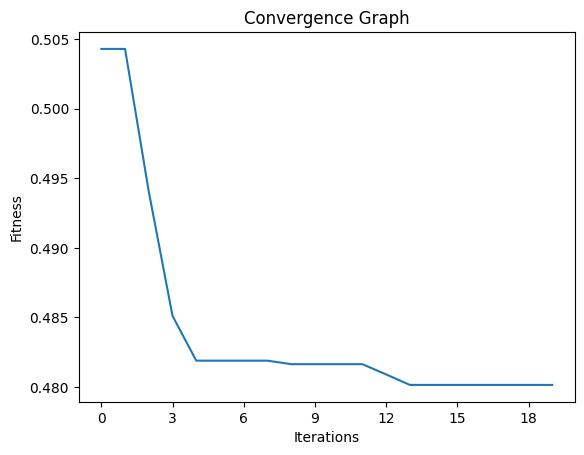

In [16]:
task.plot_convergence()